In [4]:
import pandas as pd
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import heapq

In [5]:
df = pd.read_csv('Airports2.csv')

In [6]:
df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


In [7]:
import networkx as nx

# Create a directed graph to handle multiple edges between nodes
graph = nx.MultiDiGraph()

# Add nodes (airports) to the graph
for airport in pd.concat([df['Origin_airport'], df['Destination_airport']]).unique():
    graph.add_node(airport)

# Add edges (flights) with attributes
for index, row in df.iterrows():
    origin = row['Origin_airport']
    destination = row['Destination_airport']
    date = row['Fly_date']
    distance = row['Distance']
    graph.add_edge(origin, destination, date=date, distance=distance)

# 2. Nodes' Contribution

By analyzing the dataset we proceed to eliminate the node associated with the Rexburg airport (FVS) because it is believed to have anomalous behavior: it is observed that it has only incoming routes and only one outgoing route, a characteristic that heavily influences the distributions of the centrality measures study.

In [14]:
graph.remove_node('FVS')

## 2.1

In [10]:
from functions import analyze_centrality

In [11]:
result = analyze_centrality(graph, "EUG")
for metric, value in result.items():
    print(f"{metric}: {value}")

Betweenness Centrality: 0.3594196216002062
Closeness Centrality: 0.4915368991198375
Degree Centrality: 0.11432506887052342
PageRank: 0.0019171458587638709


## 2.2

we implement an improved and more efficient version to reduce the complexity of the calculations by having to calculate for all nodes

In [12]:
from functions import compare_centralities

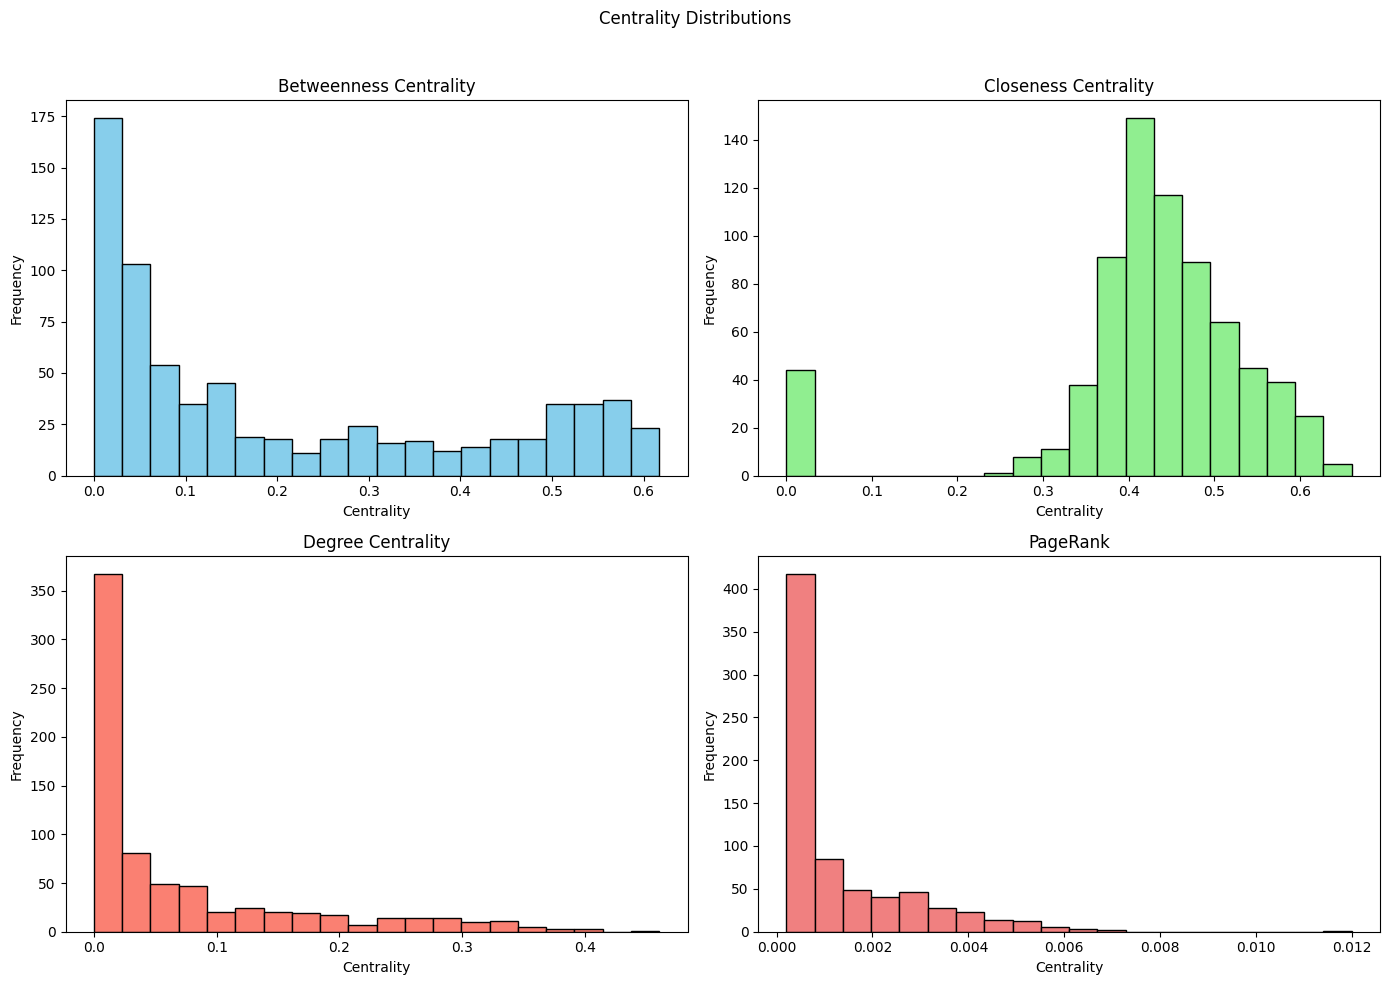

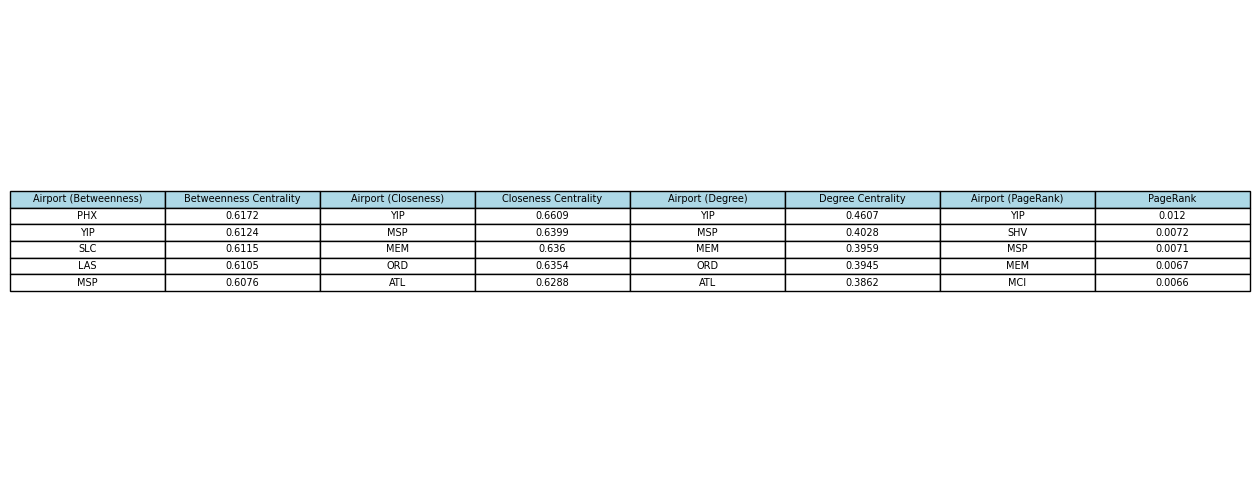

In [15]:
compare_centralities(graph)

## 2.3

In addition to the typical centrality measures like **Degree**, **Closeness**, **Betweenness**, and **PageRank**, several other centrality measures could be relevant for this directed graph. These measures can provide different perspectives on node importance in a directed graph, and might help uncover insights missed by the standard measures.

Here are three alternative centrality measures that might be useful:

#### a) **Eigenvector Centrality**
   - **Definition**: Eigenvector centrality assigns a score to each node based on the principle that connections to high-scoring nodes contribute more to the score of the node in question. It is based on the eigenvector of the graph's adjacency matrix.
   - **How it's calculated**: The calculation involves solving the equation $( A \cdot v = \lambda \cdot v )$, where $A$ is the adjacency matrix, $v$ is the vector of centrality scores, and $\lambda$ is a constant (the eigenvalue). This is solved iteratively using power iteration methods.

   - **Insight**: This measure captures the influence of a node in terms of the influence of its neighbors. It can identify nodes that are connected to other important nodes, even if their direct degree is not high.

#### b) **Katz Centrality**
   - **Definition**: Katz centrality is a variation of eigenvector centrality but includes a decay factor that limits the influence of distant nodes. It calculates centrality as the sum of direct and indirect neighbors' influence, weighted by a decay factor $\beta$.
   - **How it's calculated**: Katz centrality for each node is computed by solving the equation $x = \alpha \cdot A \cdot x + b$, where $A$ is the adjacency matrix, $\alpha$ is a scaling factor, and $b$ is a vector representing direct node influences.

   - **Insight**: Katz centrality identifies nodes that are influential but gives diminishing importance to nodes that are further away, making it suitable for networks where short paths are more relevant than long ones.

#### c) **HITS (Hyperlink-Induced Topic Search)**
   - **Definition**: The HITS algorithm computes two scores for each node: **authority** and **hub**. Hubs are nodes that point to many authorities, and authorities are nodes that are pointed to by many hubs. This method is useful for identifying nodes with strong authority or strong hub-like connections.
   - **How it's calculated**: The algorithm runs iteratively:
     1. Compute the authority score by summing the hub scores of the nodes pointing to the current node.
     2. Compute the hub score by summing the authority scores of the nodes that the current node points to.
     The process is repeated until the scores converge.

   - **Insight**: This measure is especially useful in analyzing networks like web pages, where certain nodes may act as "authorities" or "hubs."


## 2.4

### HITS Algorithm - Explanation and Insights

The **HITS (Hyperlink-Induced Topic Search)** algorithm provides two new measures: **Authority** and **Hub**. These measures can be useful for identifying nodes with strong indirect influence and for better understanding network dynamics, especially in graphs with a strong hierarchy or reference structure. 

- **Authority**: Nodes that are considered authoritative are often those that receive a large number of incoming connections from hubs.
- **Hub**: Hubs are nodes that have many outgoing connections, pointing to authoritative nodes.

Compared to other centrality measures, **HITS** may offer new perspectives, especially in directed graphs where the relationship between nodes is not symmetric. For instance:
- **Authority**: A node with a high **Authority** score but a low **Degree** or **Closeness** score might be a node with a strong indirect influence, recognized as an authoritative source by other nodes but not necessarily close to other nodes.
- **Hub**: A node with a high **Hub** score but low **Betweenness** might be a node that acts as a bridge between groups of nodes, without being particularly influential in terms of information flow.

Therefore, **HITS** could provide insights into the structure of networks, particularly in directed graphs, where it helps identify nodes that might not be the most connected but still play crucial roles in the overall network dynamics.


In [10]:
from functions import compute_hits
from functions import compute_degree
from functions import compute_betweenness
from functions import top_5_authority_low_degree
from functions import top_5_hub_low_betweenness

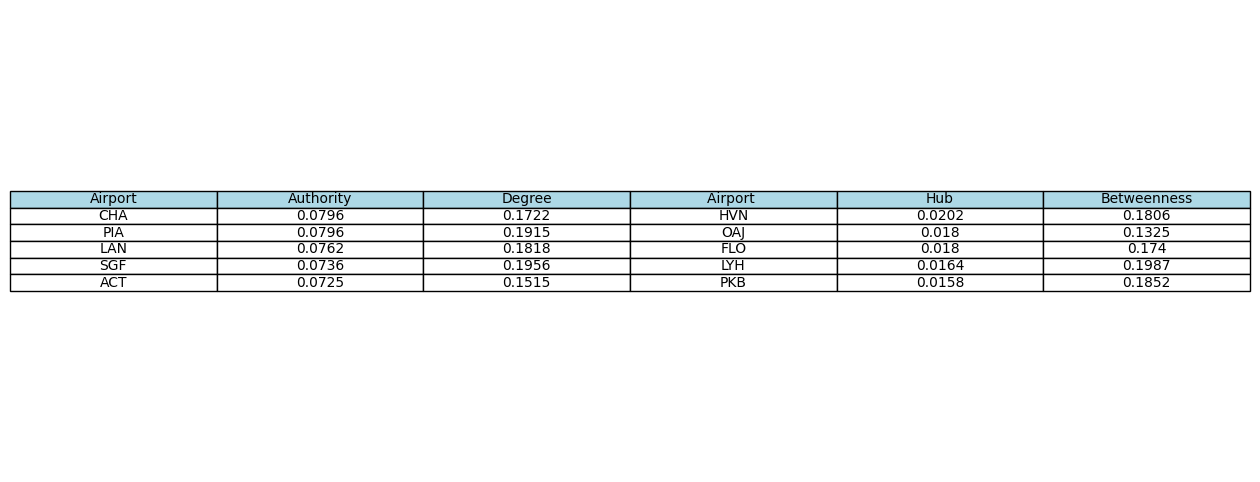

In [11]:
authority, hub = compute_hits(graph)  
degree = compute_degree(graph)  
betweenness = compute_betweenness(graph)

# Find top 5 airports with high authority and low degree
top_5_authority_low_degree_results = top_5_authority_low_degree(graph, authority, degree)

# Find top 5 airports with high hub and low betweenness
top_5_hub_low_betweenness_results = top_5_hub_low_betweenness(graph, hub, betweenness)


# Convert results into pandas DataFrames
df_authority_degree = pd.DataFrame(top_5_authority_low_degree_results)
df_hub_betweenness = pd.DataFrame(top_5_hub_low_betweenness_results)

# Combine the two DataFrames into one, matching airports from both lists
df_combined = pd.DataFrame()

# Adding authority and degree from the first list
df_combined['Airport'] = df_authority_degree['Airport']
df_combined['Authority'] = df_authority_degree['Authority']
df_combined['Degree'] = df_authority_degree['Degree']

# Adding hub and betweenness from the second list (notice extra space in column name)
df_combined['Airport '] = df_hub_betweenness['Airport']
df_combined['Hub'] = df_hub_betweenness['Hub']
df_combined['Betweenness'] = df_hub_betweenness['Betweenness']


# Visualize the table using Matplotlib
fig, ax = plt.subplots(figsize=(16, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_combined.values, colLabels=df_combined.columns, loc='center', cellLoc='center', colColours=['lightblue']*df.shape[1])

plt.show()

* **Top 5 Airports with High Authority and Low Degree**:
 - **What it means**: Airports with **high authority and low degree** are those that, despite not having many direct connections to other airports (low *degree*), are still considered very important in the network because they receive many connections (high *authority*). These airports are "arrival nodes" or central destinations for other airports, but they are not necessarily very well-connected directly.

    - **Example**: A major international airport that receives many flights from all over the USA (high *authority*), but has few direct flights to other airports (low *degree*).

* **Top 5 Airports with High Hub and Low Betweenness**:
 - **What it means**: Airports with **high hub and low betweenness** are those with many outgoing connections (high *hub*), but are not critical in connecting other airports to each other (low *betweenness*). In other words, these airports are important as starting points for flights to other destinations, but they are not key for the flow of flights between other airports.

    - **Example**: An airport that has many departing flights to different destinations (high *hub*), but is not a key airport for connecting or bridging flights between other airports (low *betweenness*). It is a popular starting point but not an "essential passage" for flights between other airports.

Both of these results provide insights into different aspects of the graph's structure.


# 3. Finding Best Routes (Q3)

In [12]:
from functions import find_origin_cities_by_name
from functions import find_destination_cities_by_name
from functions import find_best_routes

In [13]:
dates = "1990-11-01"
origin = "New York"
destination = "Los Angeles"

In [14]:
routes_df = find_best_routes(graph, find_origin_cities_by_name(origin, df), find_destination_cities_by_name(destination, df), dates)
routes_df

,Origin_city_airport,Destination_city_airport,Best_route
0,JFK,LAX,JFK → LAX
1,LGA,LAX,LGA → EWR → LAX
2,JRA,LAX,No route found.
3,JRB,LAX,No route found.
4,TSS,LAX,No route found.
5,WTC,LAX,No route found.


Iterative map that show the various paths

In [15]:
from functions import create_usa_airports_map
from functions import add_routes_to_map

In [16]:
# Create a map of US airports
map = create_usa_airports_map(df)
map.save('usa_airports_map.html')  # Save the map as HTML file

# Add best routes to the existing map
usa_map_with_routes = add_routes_to_map(map, routes_df, df)

# Save the updated map with routes
usa_map_with_routes.save('usa_airports_map_with_routes.html')